In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import librosa as lb
from librosa import display

In [ ]:
# train=np.load("audio_train.npy")
# test=np.load("audio_test.npy")
from google.colab import drive
drive.mount('/content/gdrive')
train=np.load("gdrive/My Drive/audio-classification/audio_train.npy")
test=np.load("gdrive/My Drive/audio-classification/audio_test.npy")

Mounted at /content/gdrive


In [ ]:
train.shape

(942, 30000)

In [ ]:
train

array([[-0.92577249, -0.66291571, -0.26374164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94556701,  1.11562371,  1.10488427, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01025403, -0.01226821, -0.01267925, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00239253,  1.10180998,  1.03759027, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00936416, -0.01141811, -0.01222591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87232733, -0.1913518 ,  0.57717735, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#train_labels=pd.read_csv("labels_train.csv",usecols=['label']).to_numpy()
train_labels=pd.read_csv("gdrive/My Drive/audio-classification/labels_train.csv",usecols=['label']).to_numpy()

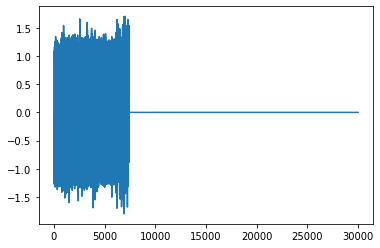

In [ ]:
plt.plot(train[0])

In [ ]:
train[0].shape

(30000,)

In [ ]:
pitch_pm = 2
pitch_change =  pitch_pm * 2*(np.random.uniform())
print("pitch_change = ",pitch_change)
pitch_changed_train = []
for i in range(train.shape[0]):
    pitch_changed = lb.effects.pitch_shift(train[i], sr=22050, n_steps=pitch_change)
    pitch_changed_train.append(pitch_changed)

pitch_change =  1.40145984314676


In [ ]:
pitch_changed_train = np.asarray(pitch_changed_train)

In [ ]:
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)

train_for_speed_change = train

speed_changed_train = []

for i in range(train_for_speed_change.shape[0]):
    tmp = lb.effects.time_stretch(train_for_speed_change[i], speed_change)
    minlen = min(train_for_speed_change[i].shape[0], tmp.shape[0])
    train_for_speed_change[i] *= 0 
    train_for_speed_change[i][0:minlen] = tmp[0:minlen]
    speed_changed_train.append(train_for_speed_change[i])

speed_change =  0.9503583499296839


In [ ]:
speed_changed_train = np.asarray(speed_changed_train)

In [ ]:
dyn_change = np.random.uniform(low=1.5,high=3)
amplified_train = []
print("dyn_change = ",dyn_change)
for i in range(train.shape[0]):
    temp_train = train[i] * dyn_change
    amplified_train.append(temp_train)

dyn_change =  1.6600831540526557


In [ ]:
amplified_train = np.asarray(amplified_train)

In [ ]:
noise_train = []
for i in range(train.shape[0]):
    noise_amp = 0.005*np.random.uniform()*np.amax(train[i])
    y_noise = train[i] + noise_amp * np.random.normal(size=train[i].shape[0])
    noise_train.append(y_noise)

In [ ]:
noise_train = np.asarray(noise_train)

In [ ]:
train_pitched_changed_append = np.append(train, pitch_changed_train, 0)

In [ ]:
trainPitchChanged_speedChangedTrain_append = np.append(train_pitched_changed_append, speed_changed_train, 0)

In [ ]:
trainPitchChangedSpeedChangedTrain_aplifiedTrain_append = np.append(trainPitchChanged_speedChangedTrain_append, amplified_train, 0)

In [ ]:
train_final = np.append(trainPitchChangedSpeedChangedTrain_aplifiedTrain_append, noise_train, 0)

In [ ]:
train_final.shape

(4710, 30000)

In [ ]:
train_spectograms = []
for i in range(train_final.shape[0]):
    spectogram = lb.stft(train_final[i])
    Xdb = lb.amplitude_to_db(abs(spectogram))
    train_spectograms.append(Xdb)

In [ ]:
train_spectograms = np.array(train_spectograms)

In [ ]:
type(train_spectograms)

numpy.ndarray

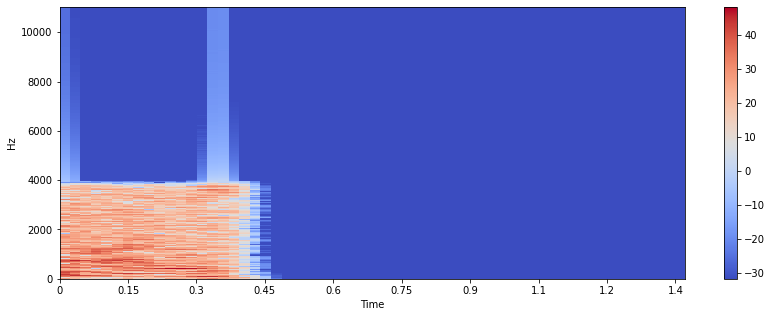

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(train_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
new_labels = train_labels
for i in range(0,4):
    train_labels_final = np.append(train_labels,new_labels,0)
    train_labels = train_labels_final

In [ ]:
train_labels_final.shape

(4710, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_spectograms, train_labels_final, test_size=0.40, random_state=101)
#X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.40, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2826, 1025, 59)
(1884, 1025, 59)
(2826, 1)
(1884, 1)


In [ ]:
X_train.shape

(2826, 1025, 59)

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1],X_train.shape[2],1)
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1],X_test.shape[2],1)

# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# X_train = X_train.reshape(2826,100,1,X_train.shape[1],X_train.shape[2])
# X_test = X_test.reshape(1884,100,1,X_test.shape[1],X_train.shape[2])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2826, 1025, 59)
(1884, 1025, 59)
(2826, 1)
(1884, 1)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
model = models.Sequential()
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True), input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
model.summary()

# model = models.Sequential()
# model.add(layers.LSTM(128, return_sequences=True, input_shape=X_train.shape[1:]))
# model.add(layers.BatchNormalization())
# model.add(layers.LSTM(128))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(10))
# model.summary()

# model = models.Sequential()
# model.add(layers.ConvLSTM2D(32,(3,3),padding='same',input_shape=(1, 1025, 59, 1),return_sequences=True))
# #model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
# model.add(layers.ConvLSTM2D(32,(3,3),padding='same',return_sequences=True))
# #model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
# model.add(layers.ConvLSTM2D(32,(3,3),padding='same'))
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1025, 64)          23552     
_________________________________________________________________
batch_normalization (BatchNo (None, 1025, 64)          256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 49,546
Trainable params: 49,290
Non-trainable params: 256
_________________________________________________________________


In [ ]:
# model.add(layers.Flatten())
# #model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1025, 64)          23552     
_________________________________________________________________
batch_normalization (BatchNo (None, 1025, 64)          256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 49,546
Trainable params: 49,290
Non-trainable params: 256
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) 

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/10
89/89 [==============================] - 19s 210ms/step - loss: 2.2226 - accuracy: 0.2371 - val_loss: 2.1520 - val_accuracy: 0.2070
Epoch 2/10
89/89 [==============================] - 17s 194ms/step - loss: 1.7785 - accuracy: 0.3708 - val_loss: 1.9695 - val_accuracy: 0.3036
Epoch 3/10
89/89 [==============================] - 17s 194ms/step - loss: 1.6174 - accuracy: 0.4200 - val_loss: 2.1291 - val_accuracy: 0.2314
Epoch 00003: early stopping


In [ ]:
test.shape

(558, 30000)

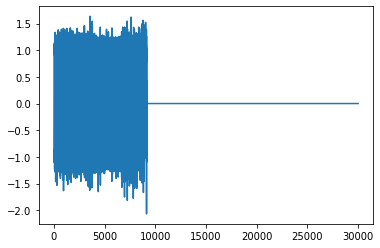

In [ ]:
plt.plot(test[0])

In [ ]:
test_spectograms = []
for i in range(test.shape[0]):
    spectogram = lb.stft(test[i])
    Xdb = lb.amplitude_to_db(abs(spectogram))
    test_spectograms.append(Xdb)

In [ ]:
test_spectograms = np.array(test_spectograms)

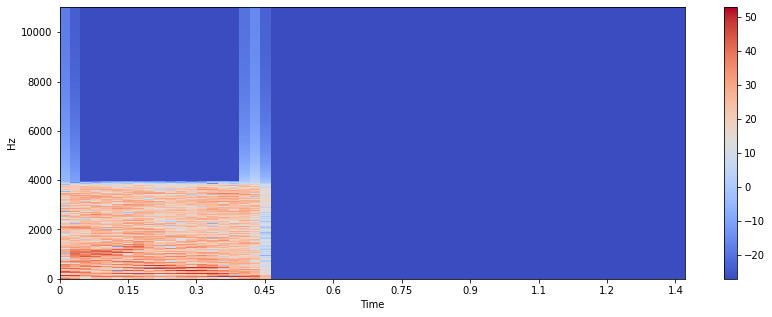

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(test_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
test_spectograms.shape

(558, 1025, 59)

In [ ]:
predictions = model.predict(test_spectograms)

In [ ]:
predictions

array([[-6.4140409e-01, -3.1901503e-01, -1.9853373e+00, ...,
         5.0646925e-01,  7.4454725e-01,  4.8157814e-01],
       [-7.6650006e-01,  1.0278745e-01, -1.9072406e+00, ...,
        -3.0683735e-01,  2.8523919e-01,  3.9033207e-01],
       [-9.9575531e-01,  1.1288655e+00, -1.2153392e+00, ...,
         2.0355445e-01, -5.5307031e-01,  1.7396433e-03],
       ...,
       [-1.6479898e-02, -9.4617742e-01, -9.1926205e-01, ...,
         1.5337862e+00,  7.7615392e-01,  1.6303539e+00],
       [-8.4223127e-01, -1.4185128e+00, -5.8131206e-01, ...,
         2.0401917e+00,  1.0502225e+00,  1.3352457e+00],
       [-1.1303985e+00,  3.1219697e-01, -1.1397974e+00, ...,
         1.3144758e-01,  7.2970366e-01, -5.4883671e-01]], dtype=float32)

In [ ]:
results = []
for i in range(len(predictions)):
    temp = []
    temp.append(i)
    temp.append(np.argmax(predictions[i]))
    results.append(temp)

In [ ]:
results

In [ ]:
results = pd.DataFrame(results,columns=['id','label'])

In [ ]:
results

,id,label
0,0,5
1,1,5
2,2,4
3,3,4
4,4,4
...,...,...
553,553,6
554,554,5
555,555,5
556,556,4


In [ ]:
# results.to_csv("Results_2D_CNN_Data_Aug.csv",index=False)
from google.colab import files

results.to_csv('LSTM-Augmentation.csv', sep=',',  index = False)

files.download('LSTM-Augmentation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>